In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dados_completo = pd.read_csv('../../input/DadosCompletoTransformadoML.csv', encoding='utf-8', delimiter='\t')
dados_completo = dados_completo.sample(frac=1).reset_index(drop=True)
dados_completo.drop(dados_completo.columns[0], axis=1, inplace=True)
dados_completo.rename(columns={'mes_abate':'month_slaughter',
                               'microrregiao':'microregion'}, 
                      inplace=True)
dados_completo.head()

,typification,maturity,carcass_weight,classification,other_incentives,makes_ration,total_area_confinement,area_80_vegetation_cover,area_20_erosion,individual_identification,sisbov,grazing_control,trace_list,quality_programs,involved_in_organization,confinement,semi_confinement,field_supplementation,fertigation,lfi,fli,clfi,latitude,longitude,month_slaughter,estacao_abate,microregion,mesoregiao,carcass_fatness_degree
0,0.0,0.00,0.525000,0.555556,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.077556,0.544640,0.727273,0.666667,0.7,1.0,3
1,0.0,0.25,0.380000,0.555556,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.222715,0.402537,1.000000,1.000000,0.6,1.0,3
2,0.0,0.00,0.454000,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.141597,0.543821,0.818182,1.000000,0.7,1.0,3
3,1.0,0.25,0.191667,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.077556,0.544640,0.363636,0.333333,0.7,1.0,2
4,0.0,0.00,0.444667,0.555556,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.284194,0.605606,0.818182,1.000000,0.7,1.0,2


In [2]:
dados_completo.describe()

,typification,maturity,carcass_weight,classification,other_incentives,makes_ration,total_area_confinement,area_80_vegetation_cover,area_20_erosion,individual_identification,sisbov,grazing_control,trace_list,quality_programs,involved_in_organization,confinement,semi_confinement,field_supplementation,fertigation,lfi,fli,clfi,latitude,longitude,month_slaughter,estacao_abate,microregion,mesoregiao,carcass_fatness_degree
count,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06,1.056586e+06
mean,4.012679e-01,2.517703e-01,3.930977e-01,3.868182e-01,5.440825e-02,6.580761e-01,1.943429e-02,8.060868e-01,2.085017e-03,7.472747e-01,4.821898e-01,8.162355e-01,4.456996e-01,2.549911e-02,3.374605e-01,6.135847e-01,4.995116e-01,9.049845e-01,9.334120e-02,4.958423e-02,4.200794e-01,5.056190e-02,5.189299e-01,5.448512e-01,6.188977e-01,6.403871e-01,5.104270e-01,4.107298e-01,2.647840e+00
std,4.292938e-01,2.406466e-01,1.528049e-01,4.019008e-01,2.268216e-01,4.743545e-01,1.380457e-01,3.953619e-01,4.561438e-02,4.345750e-01,4.996829e-01,3.872922e-01,4.970430e-01,1.576354e-01,4.728436e-01,4.869279e-01,5.000000e-01,2.932364e-01,2.909101e-01,2.170845e-01,4.935716e-01,2.191014e-01,2.366585e-01,1.920560e-01,3.057610e-01,3.639750e-01,3.573839e-01,3.833182e-01,5.982199e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,2.880000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.528844e-01,4.451714e-01,4.545455e-01,3.333333e-01,1.000000e-01,0.000000e+00,2.000000e+00
50%,5.000000e-01,2.500000e-01,4.060000e-01,5.555556e-01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.517022e-01,5.438209e-01,7.272727e-01,6.666667e-01,5.000000e-01,3.333333e-01,3.000000e+00
75%,1.000000e+00,5.000000e-01,4.966667e-01,5.555556e-01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.942991e-01,6.686572e-01,9.090909e-01,1.000000e+00,8.000000e-01,6.666667e-01,3.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc5b71dfd0>,
      dtype=object)

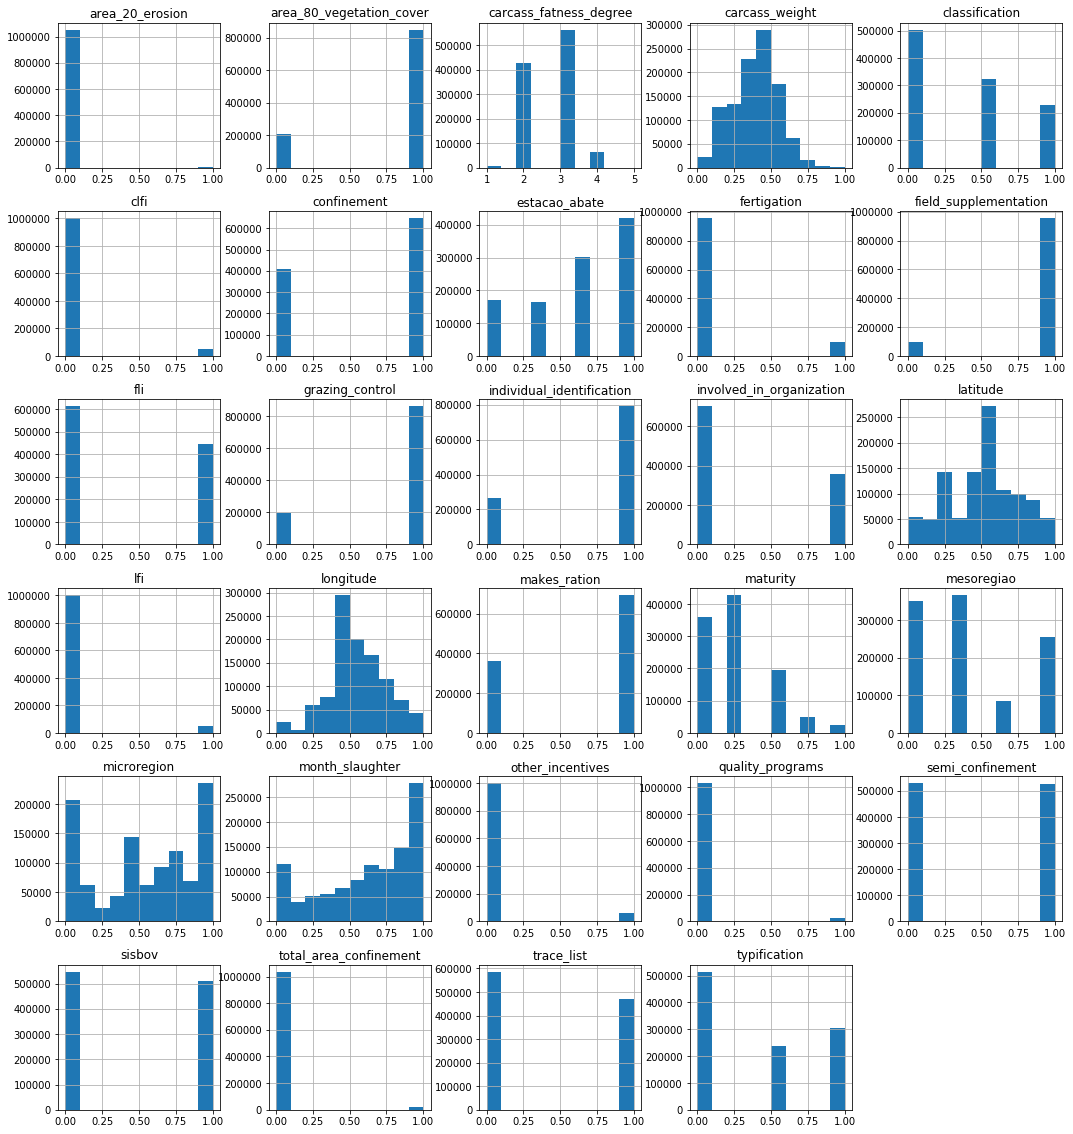

In [3]:
fig = plt.figure(figsize = (18,20))
ax = fig.gca()
dados_completo.hist(ax = ax)

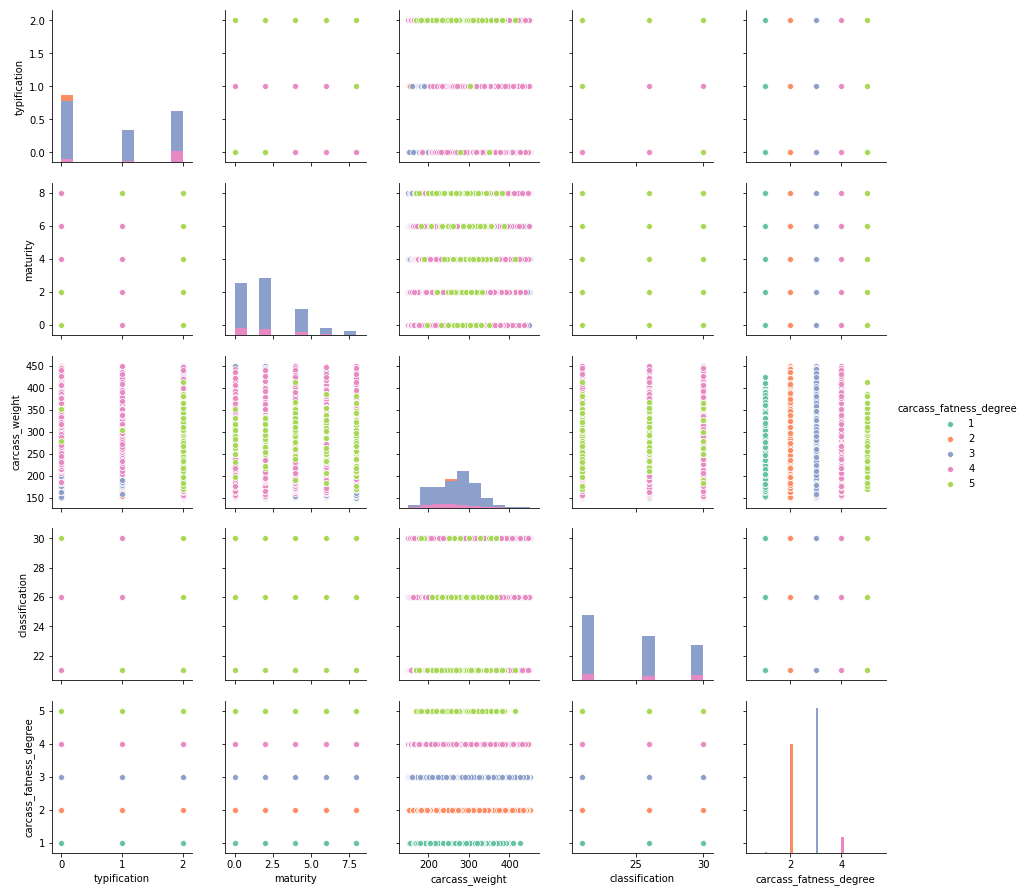

In [3]:
# Histogram
sns.pairplot(dados_completo[["typification", "maturity", "carcass_weight", 
                            "classification", "carcass_fatness_degree"]], 
             diag_kind="hist", hue='carcass_fatness_degree', palette="Set2")
plt.show()

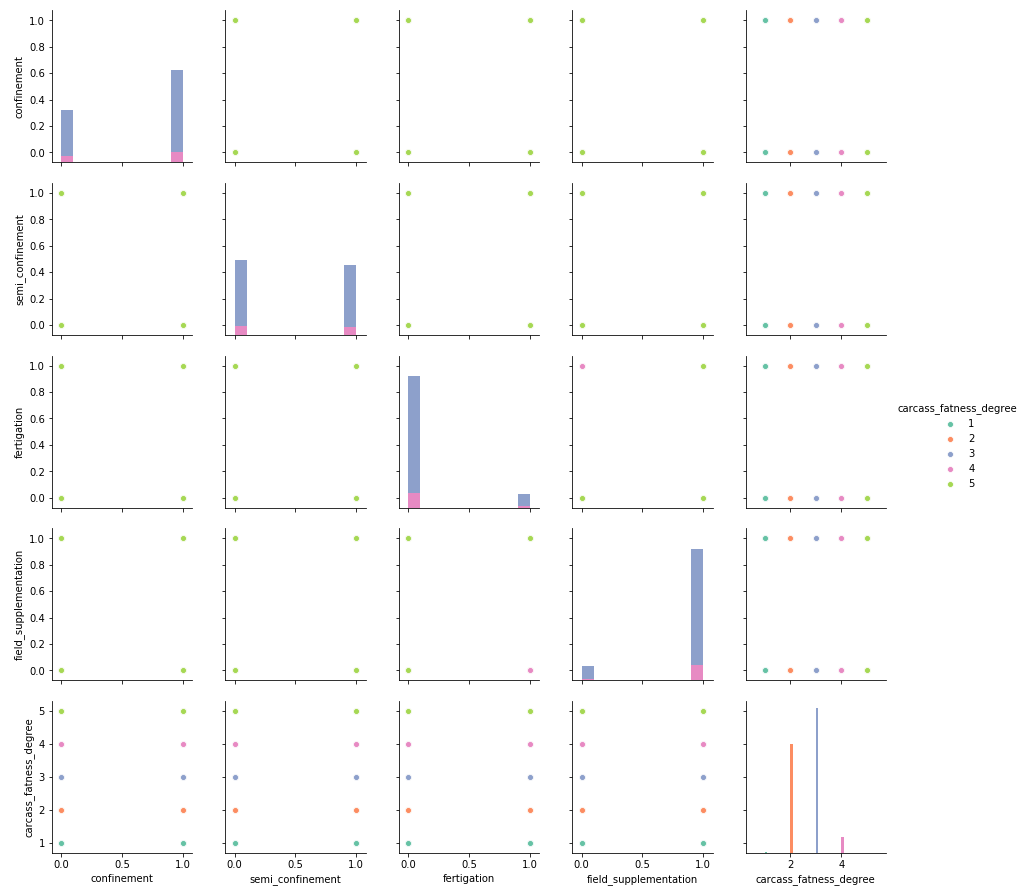

In [9]:
# Histogram
sns.pairplot(dados_completo, vars=["confinement", "semi_confinement", "fertigation", 
                            "field_supplementation", 'carcass_fatness_degree'] ,
             diag_kind="hist", hue='carcass_fatness_degree', palette="Set2")
plt.show()

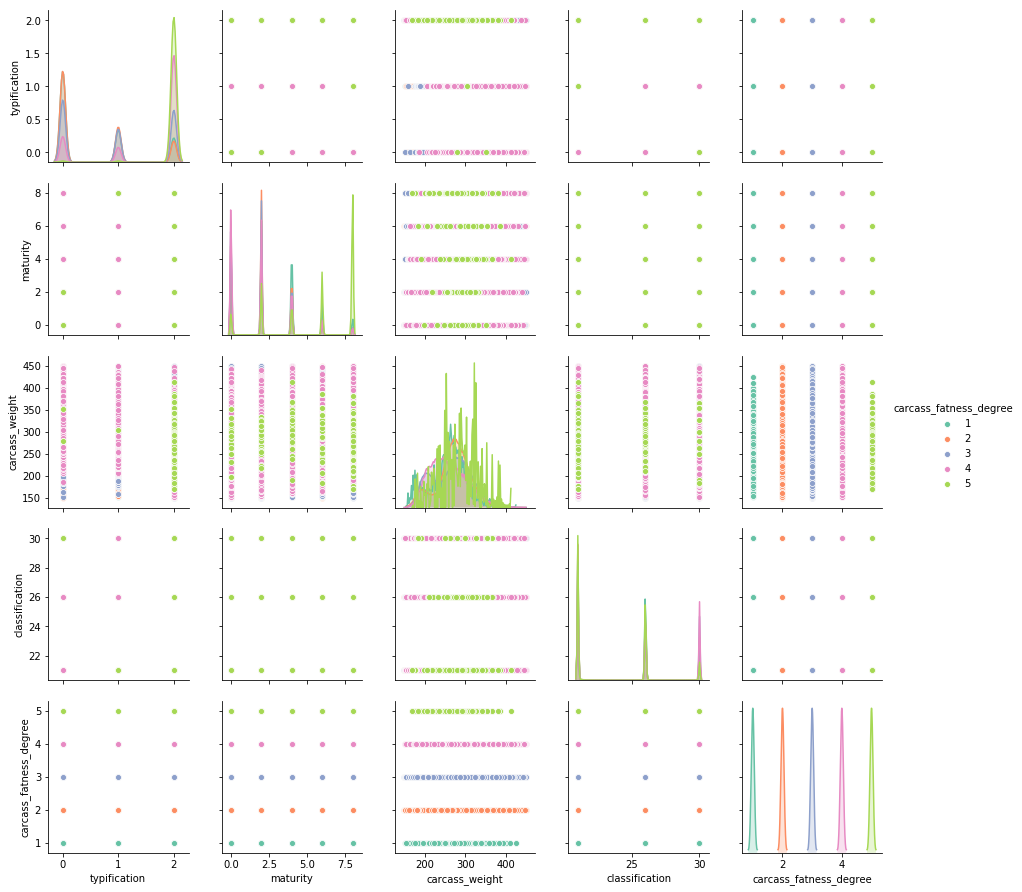

In [19]:
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(dados_completo[["typification", "maturity", "carcass_weight", 
                            "classification", "carcass_fatness_degree"]], 
             diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False), 
             hue="carcass_fatness_degree", palette="Set2")
plt.show()

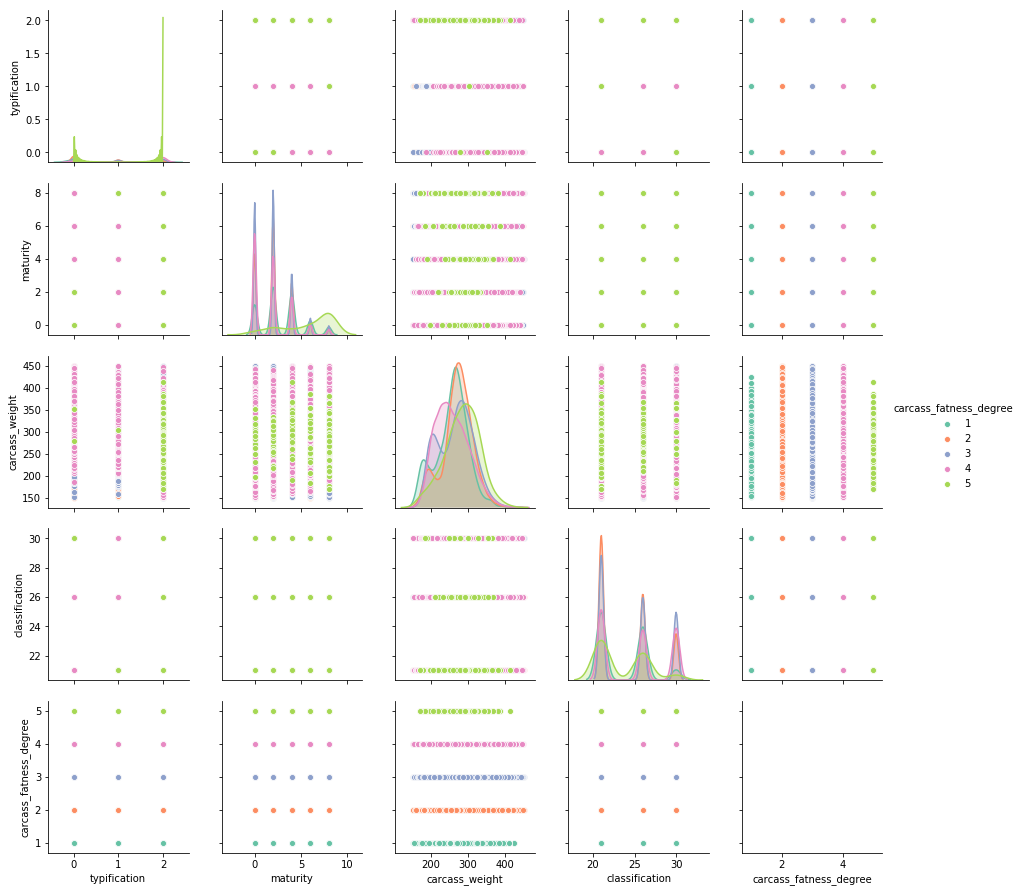

In [8]:
sns.pairplot(dados_completo[["typification", "maturity", "carcass_weight", 
                            "classification", "carcass_fatness_degree"]], kind="scatter", 
             hue="carcass_fatness_degree", markers="o", palette="Set2", alpha=0.3)
plt.show()

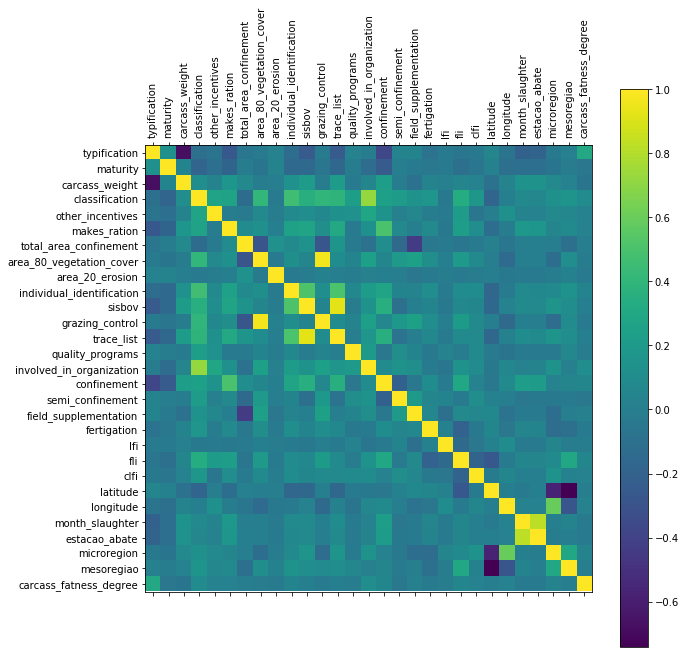

In [28]:
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(10,10))
plt.matshow(dados_completo.corr(), fignum=1)
plt.xticks(range(len(dados_completo.columns)), dados_completo.columns)
plt.yticks(range(len(dados_completo.columns)), dados_completo.columns)
plt.xticks(rotation=90)
plt.colorbar()
plt.show()

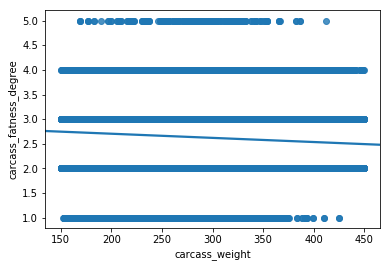

In [12]:
# regression fit
sns.regplot(x=dados_completo["carcass_weight"], y=dados_completo["carcass_fatness_degree"], fit_reg=True)
plt.show()

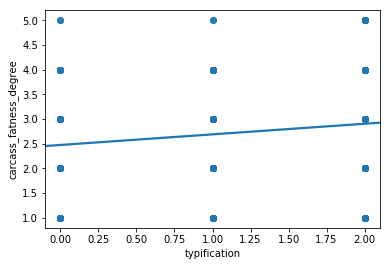

In [13]:
# regression fit
sns.regplot(x=dados_completo["typification"], y=dados_completo["carcass_fatness_degree"], fit_reg=True)
plt.show()

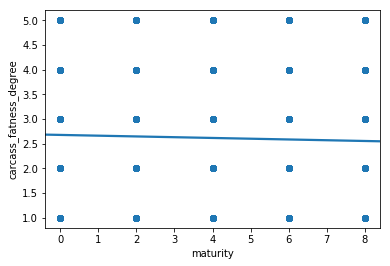

In [14]:
# regression fit
sns.regplot(x=dados_completo["maturity"], y=dados_completo["carcass_fatness_degree"], fit_reg=True)
plt.show()

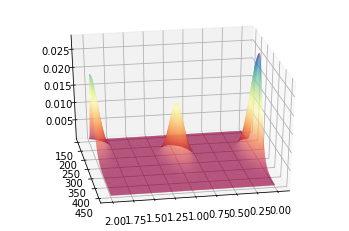

In [17]:
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([dados_completo.typification,dados_completo.carcass_weight])
xi, yi = np.mgrid[ dados_completo.typification.min():dados_completo.typification.max():nbins*1j, dados_completo.carcass_weight.min():dados_completo.carcass_weight.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)
